# **Computational Drug Discovery Comparing Regressors**




**We will use the Package of pycaret as its has low line of code for multiple regressors comparision and plots visualization.
 For interpertation models we use the Shap Package**

## **1. Install the Package's**

## **2. Load the data set**


**Import libraries**

In [1]:
import pandas as pd
from pycaret.regression import *

## **3. Data pre-processing**

Import Clean Fingerprint Files *.csv

In [2]:
ap2dc = pd.read_csv('Pubchem.csv')
#view
ap2dc

,Unnamed: 0,pIC50,PubchemFP2,PubchemFP3,PubchemFP13,PubchemFP16,PubchemFP17,PubchemFP18,PubchemFP19,PubchemFP20,PubchemFP24,PubchemFP116,PubchemFP143,PubchemFP150,PubchemFP181,PubchemFP186,PubchemFP187,PubchemFP192,PubchemFP193,PubchemFP195,PubchemFP199,PubchemFP200,PubchemFP206,PubchemFP256,PubchemFP259,PubchemFP260,PubchemFP261,PubchemFP334,PubchemFP335,PubchemFP338,PubchemFP341,PubchemFP342,PubchemFP346,PubchemFP363,PubchemFP364,PubchemFP368,PubchemFP374,PubchemFP377,PubchemFP380,PubchemFP385,PubchemFP388,PubchemFP391,PubchemFP393,PubchemFP395,PubchemFP397,PubchemFP404,PubchemFP409,PubchemFP431,PubchemFP432,PubchemFP438,PubchemFP439,PubchemFP488,PubchemFP491,PubchemFP496,PubchemFP511,PubchemFP513,PubchemFP522,PubchemFP528,PubchemFP539,PubchemFP540,PubchemFP542,PubchemFP543,PubchemFP546,PubchemFP571,PubchemFP572,PubchemFP576,PubchemFP577,PubchemFP580,PubchemFP593,PubchemFP602,PubchemFP609,PubchemFP611,PubchemFP612,PubchemFP614,PubchemFP635,PubchemFP636,PubchemFP638,PubchemFP643,PubchemFP644,PubchemFP645,PubchemFP646,PubchemFP647,PubchemFP656,PubchemFP658,PubchemFP659,PubchemFP682,PubchemFP685,PubchemFP688,PubchemFP695,PubchemFP696,PubchemFP697,PubchemFP698,PubchemFP699,PubchemFP702,PubchemFP703,PubchemFP707,PubchemFP712,PubchemFP713,PubchemFP714,PubchemFP716,PubchemFP734,PubchemFP784,PubchemFP791,PubchemFP800,PubchemFP812,PubchemFP815,PubchemFP819,PubchemFP821,PubchemFP822
0,1,8.958607,1,0,0,0,0,1,0,0,0,0,0,0,1,1,1,1,1,0,1,0,1,0,1,0,0,0,1,1,0,1,0,0,1,0,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,1,1,0,1,0,0,0,0,1,0,1,1,0,0,0,0,0,1,1,0,0,1,0,0,1,0,1,0,1,1
1,2,9.397940,1,0,0,0,0,1,0,0,0,1,0,0,1,1,1,1,1,0,1,0,1,0,1,0,0,0,1,1,0,1,0,0,1,0,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,1,1,0,1,0,0,0,0,1,0,1,1,0,0,0,0,0,1,1,0,0,1,0,0,1,0,1,0,1,1
2,3,7.356547,1,0,0,0,0,1,1,0,0,0,0,0,1,1,0,1,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,1,1,0,1,0,0,1,1,1,0,1,1,1,1,0,0,0,1,1,0,0,1,0,0,1,0,1,0,1,0
3,4,9.045757,1,0,0,0,0,1,0,0,0,0,0,0,1,1,1,1,1,0,1,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,1,0,1,0,1,1,0,1,0,0,0,0,1,0,1,1,0,0,0,0,0,1,1,0,0,1,0,0,1,0,1,0,1,1
4,5,8.522879,0,0,0,0,0,1,1,0,0,0,0,0,1,1,0,1,1,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,1,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1,0,0,0,1,0,1,0,1,0,0,0,0,1,1,0,0,1,1,0,1,0,0,0,0,1,0,1,1,1,1,1,1,0,1,0,1,0,0,0,0,1,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2181,2182,5.853872,1,0,0,1,0,1,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,1,1,1,1,0,0,1,0,0,0,0,0,1,1,0,0,1,1,0,1,0,0,0,0,0,0,1,1,0,1,1,0,1,0,1,0,1,0,0,0,0,1,1,1,0,1,0,0,1,0,0,0,1,0,1,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2182,2183,4.000000,1,0,0,1,0,1,0,0,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,1,0,0,0,1,0,1,0,1,0,0,1,0,0,1,1,0,1,0,0,0,0,0,0,1,1,0,1,1,0,1,0,1,0,1,0,0,0,0,1,1,1,0,1,0,1,1,0,0,0,1,0,1,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2183,2184,8.301030,1,1,0,1,0,1,1,0,0,0,1,0,0,1,0,1,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0,1,0,0,0,1,1,1,0,0,1,0,0,1,1,1,1,0,0,0,0,0,1,0,0,1,1,1,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2184,2185,8.301030,1,0,0,0,0,1,1,1,1,0,0,0,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,1,1,1,1,0,0,1,1,0,1,1,0,0,0,1,0,0,0,0,0


In [3]:
model  = setup(data = ap2dc, target = 'pIC50', train_size=0.8, silent=True)

,Description,Value
0,session_id,2335
1,Target,pIC50
2,Original Data,"(2186, 109)"
3,Missing Values,False
4,Numeric Features,1
5,Categorical Features,107
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(1748, 107)"


## **4. Compare ML algorithms**

In [4]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.5824,0.6264,0.7908,0.5475,0.1009,0.0851,0.0350
rf,Random Forest Regressor,0.5821,0.6391,0.7982,0.5387,0.1018,0.0852,0.3150
knn,K Neighbors Regressor,0.5984,0.6811,0.8237,0.5098,0.1050,0.0875,0.0220
gbr,Gradient Boosting Regressor,0.6478,0.7152,0.8452,0.4823,0.1078,0.0948,0.1290
br,Bayesian Ridge,0.7435,0.8976,0.9467,0.3514,0.1204,0.1093,0.0120
ridge,Ridge Regression,0.7463,0.9116,0.9542,0.3410,0.1210,0.1093,0.0080
lr,Linear Regression,0.7471,0.9143,0.9556,0.3392,0.1211,0.1093,0.4080
huber,Huber Regressor,0.7376,0.9411,0.9691,0.3206,0.1224,0.1083,0.1210
ada,AdaBoost Regressor,0.8189,1.0073,1.0029,0.2729,0.1274,0.1184,0.1050
omp,Orthogonal Matching Pursuit,0.8130,1.0444,1.0212,0.2450,0.1307,0.1204,0.0070


LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=2335, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

**Create Model On Selected Model**

In [5]:
lightgbm = create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.5777,0.6106,0.7814,0.5396,0.0959,0.0810
1,0.6270,0.7068,0.8407,0.5252,0.1055,0.0915
2,0.6126,0.7096,0.8424,0.5243,0.1115,0.0934
3,0.5735,0.5864,0.7657,0.6203,0.0961,0.0824
4,0.5797,0.6505,0.8066,0.5736,0.1058,0.0876
5,0.5863,0.6291,0.7932,0.5581,0.1053,0.0889
6,0.5466,0.5561,0.7457,0.4686,0.0953,0.0779
7,0.5342,0.5596,0.7480,0.5766,0.0951,0.0781
8,0.5994,0.6232,0.7894,0.5532,0.0979,0.0853
9,0.5873,0.6319,0.7949,0.5355,0.1007,0.0844


## **5. Tuning of model performance**

**Tuning the Hyperparameter**

In [6]:
tuned_lightgbm = tune_model(lightgbm, n_iter= 50,optimize='mae')


,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.6241,0.6784,0.8236,0.4885,0.1015,0.0882
1,0.6835,0.8142,0.9023,0.4531,0.1131,0.0998
2,0.6215,0.6907,0.8311,0.5370,0.1092,0.0942
3,0.5966,0.6207,0.7878,0.5981,0.0994,0.0858
4,0.6204,0.6907,0.8311,0.5473,0.1087,0.0937
5,0.6189,0.6953,0.8339,0.5116,0.1104,0.0937
6,0.6019,0.6442,0.8027,0.3844,0.1037,0.0864
7,0.5904,0.6472,0.8045,0.5103,0.1023,0.0856
8,0.6198,0.6285,0.7928,0.5494,0.0987,0.0877
9,0.6030,0.6550,0.8093,0.5185,0.1039,0.0881


In [7]:
print(tuned_lightgbm)

LGBMRegressor(bagging_fraction=0.9, bagging_freq=7, boosting_type='gbdt',
              class_weight=None, colsample_bytree=1.0, feature_fraction=0.8,
              importance_type='split', learning_rate=0.3, max_depth=-1,
              min_child_samples=81, min_child_weight=0.001, min_split_gain=0,
              n_estimators=230, n_jobs=-1, num_leaves=50, objective=None,
              random_state=2335, reg_alpha=5, reg_lambda=3, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


**Model Hyperparameter**

Original Model Parameters

In [8]:
plot_model(lightgbm, 'parameter')

,Parameters
boosting_type,gbdt
class_weight,None
colsample_bytree,1.0
importance_type,split
learning_rate,0.1
max_depth,-1
min_child_samples,20
min_child_weight,0.001
min_split_gain,0.0
n_estimators,100


Tuned Model Parameters

In [9]:
plot_model(tuned_lightgbm, 'parameter')

,Parameters
boosting_type,gbdt
class_weight,None
colsample_bytree,1.0
importance_type,split
learning_rate,0.3
max_depth,-1
min_child_samples,81
min_child_weight,0.001
min_split_gain,0
n_estimators,230


# **6. Model Analysis**

Details of the regression plots are available at https://pycaret.org/plot-model/.

**Residuals Plot**

In [10]:
plot_model(tuned_lightgbm, 'residuals' , save =True)

'Residuals.png'

**Prediction Error Plot**

In [11]:
plot_model(tuned_lightgbm, 'error', save =True)

'Prediction Error.png'

**Recursive Feature Selection**

In [12]:
#plot_model(tuned_lightgbm, 'rfe', save =True)

**Learning Curve**

In [13]:
plot_model(tuned_lightgbm, 'learning' , save =True ) 

'Learning Curve.png'

**Validation Curve**

In [14]:
plot_model(tuned_lightgbm, 'vc', save = True) 

'Validation Curve.png'

**Model Interpretaion**

SHAP plots adds interpretability to constructed models so that the contribution of each features to the prediction can be elucidated.

**Summary Plot**

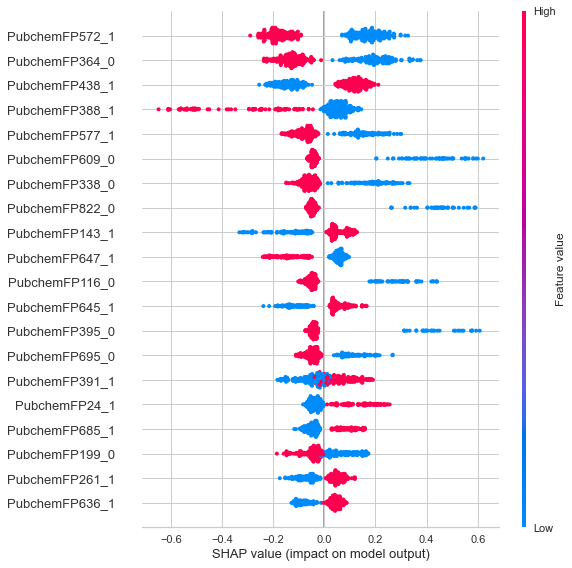

In [15]:
interpret_model(tuned_lightgbm, save =True)

**Correlation Plot**

**Reason Plot at Observation Level**

The Reason Plot at Observation Level as called by PyCaret is better known as the force plot and this plot essentially describes the push and pull effect that each individual features has on the base value that eventually leads to the predicted output value.


In [16]:
interpret_model(tuned_lightgbm, plot = 'reason', observation = 10 , save = True)  

# **Testing on 20% Model**

In [17]:
prediction_holdout = predict_model(tuned_lightgbm)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,0.5819,0.6191,0.7868,0.5457,0.1004,0.0862


In [18]:
# Predicted Value in "Label"  pIC50 experimantal
prediction_holdout.head()

,PubchemFP2_0,PubchemFP3_0,PubchemFP13_1,PubchemFP16_1,PubchemFP17_0,PubchemFP18_0,PubchemFP19_1,PubchemFP20_0,PubchemFP24_1,PubchemFP116_0,...,PubchemFP784_0,PubchemFP791_0,PubchemFP800_0,PubchemFP812_0,PubchemFP815_1,PubchemFP819_1,PubchemFP821_0,PubchemFP822_0,pIC50,Label
0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,7.173925,6.489982
1,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,8.045757,7.898118
2,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,8.113509,8.562465
3,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,6.838632,7.007958
4,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,8.730487,7.071935


**Finalize Model**

In [19]:
final_lightgbm = finalize_model(tuned_lightgbm)

In [20]:
#difference
lightgbm ,tuned_lightgbm , final_lightgbm

(LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=2335, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0),
 LGBMRegressor(bagging_fraction=0.9, bagging_freq=7, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.8,
               importance_type='split', learning_rate=0.3, max_depth=-1,
               min_child_samples=81, min_child_weight=0.001, min_split_gain=0,
               n_estimators=230, n_jobs=-1, num_leaves=50, objective=None,
               random_state=2335, reg_alpha=5, reg_lambda=3, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0),
 LGBMRegres

In [21]:
predict_model(final_lightgbm)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,0.4622,0.3857,0.6211,0.7169,0.0791,0.0676


,PubchemFP2_0,PubchemFP3_0,PubchemFP13_1,PubchemFP16_1,PubchemFP17_0,PubchemFP18_0,PubchemFP19_1,PubchemFP20_0,PubchemFP24_1,PubchemFP116_0,...,PubchemFP784_0,PubchemFP791_0,PubchemFP800_0,PubchemFP812_0,PubchemFP815_1,PubchemFP819_1,PubchemFP821_0,PubchemFP822_0,pIC50,Label
0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,7.173925,7.040973
1,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,8.045757,7.901649
2,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,8.113509,8.095033
3,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,6.838632,6.957178
4,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,8.730487,7.425321
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
433,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,7.443697,7.375483
434,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,7.180456,7.085020
435,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,8.431798,7.418394
436,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,8.318759,8.326118


In [22]:
save_experiment('Pubchem')

NameError: name 'sasave_experiment' is not defined